In [1]:
import numpy as np
import roboticstoolbox as rtb
from spatialmath import *
from math import pi
import matplotlib.pyplot as plt
from matplotlib import cm
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})
%matplotlib notebook

L1 = rtb.DHLink(theta=0.0, d=0.68, a=0.105, alpha=pi/2, offset=0.0)
L2 = rtb.DHLink(theta=0.0, d=0.0, a=1.15, alpha=0.0, offset=pi/2)
L3 = rtb.DHLink(theta=0.0, d=0.0, a=0.0, alpha=pi/2, offset=0.0)
L4 = rtb.DHLink(theta=0.0, d=1.850, a=0.0, alpha=-pi/2, offset=0.0)
L5 = rtb.DHLink(theta=0.0, d=0.0, a=0.0, alpha=pi/2, offset=0.0)
L6 = rtb.DHLink(theta=0.0, d=0.095, a=0.0, alpha=0.0, offset=0.0)
robot = rtb.DHRobot([L1, L2, L3, L4, L5, L6])
print(robot.fkine([0,0,0,0,0,0]))

class Point:
    def __init__(self,x,y,z):
        self.x=x
        self.y=y
        self.z=z
    def __sub__(self, other):
        x = self.x - other.x
        y = self.y - other.y
        z = self.z - other.z
        return Point(x,y,z)
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        z = self.z + other.z
        return Point(x,y,z)
    def __str__(self):
        return "({}, {}, {})".format(self.x,self.y,self.z)

class PointNotInRange(Exception):
    def __init__(self,p):
        self.message="Point "+str(p)+" is not in range"
        super().__init__(self.message)

   0         0         1         2.05      
   0        -1         0         0         
   1         0         0         1.83      
   0         0         0         1         



## Bez macierzy przekształcenia:

In [3]:
A=Point(2.05,-0.5,1.83)
B=Point(2.05,-0.5,0.83)
C=Point(2.05,0.5,0.83)
D=Point(2.05,0.5,1.83)
        
points=[A,B,C,D]
for p in points:
    rot = SE3.OA([0,0,1],[1,0,0])
    trans = SE3(p.x, p.y, p.z)
    T = trans*rot
    sol = robot.ikine_LM(T)
    if not sol.success:
        raise PointNotInRange(p)

qr=[]
trans_list=[]
with open("Wynik_KO.txt", "w") as plik:
    plik.write("q1,q2,q3,q4,q5,q6,\n")
    rot = SE3.OA([0,0,1],[1,0,0])
    trans = SE3(A.x, A.y, A.z)
    T = trans*rot
    sol = robot.ikine_LM(T)
    qr.append(sol.q)
    trans_list.append(T)

    for i in range(101):
        trans = SE3(A.x+(B-A).x*i/100, A.y+(B-A).y*i/100, A.z+(B-A).z*i/100)
        T = trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list.append(T)
    for i in range(101):
        trans = SE3(B.x+(C-B).x*i/100, B.y+(C-B).y*i/100, B.z+(C-B).z*i/100)
        T = trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list.append(T)
    for i in range(101):
        trans = SE3(C.x+(D-C).x*i/100, C.y+(D-C).y*i/100, C.z+(D-C).z*i/100)
        T = trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list.append(T)
    for i in range(101):
        trans = SE3(D.x+(A-D).x*i/100, D.y+(A-D).y*i/100, D.z+(A-D).z*i/100)
        T = trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list.append(T)

    
    q_array = np.array(qr)
    for row in q_array:
        plik.write(str(row[0]))
        plik.write(",")
        plik.write(str(row[1]))
        plik.write(",")
        plik.write(str(row[2]))
        plik.write(",")
        plik.write(str(row[3]))
        plik.write(",")
        plik.write(str(row[4]))
        plik.write(",")
        plik.write(str(row[5]))
        plik.write(",\n")

   1         0         0         0         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         



## Z macierzą przekształcenia:

In [3]:
A=Point(2.05,-0.5,1.83)
B=Point(2.05,-0.5,0.83)
C=Point(2.05,0.5,0.83)
D=Point(2.05,0.5,1.83)

#macierz P
rot = SE3.OA([1,0,0],[0,0,1])
trans = SE3(0.2, 0.2, 0.2)
P=trans*rot
        
points=[A,B,C,D]
for p in points:
    rot = SE3.OA([0,0,1],[1,0,0])
    trans = SE3(p.x, p.y, p.z)
    T = P*trans*rot
    sol = robot.ikine_LM(T)
    if not sol.success:
        raise PointNotInRange(p)

qr=[]
trans_list2=[]
with open("Wynik_KO2.txt", "w") as plik:
    plik.write("q1,q2,q3,q4,q5,q6,\n")
    rot = SE3.OA([0,0,1],[1,0,0])
    trans = SE3(A.x, A.y, A.z)
    T = P*trans*rot
    sol = robot.ikine_LM(T)
    qr.append(sol.q)
    trans_list2.append(T)

    for i in range(101):
        trans = SE3(A.x+(B-A).x*i/100, A.y+(B-A).y*i/100, A.z+(B-A).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list2.append(T)
    for i in range(101):
        trans = SE3(B.x+(C-B).x*i/100, B.y+(C-B).y*i/100, B.z+(C-B).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list2.append(T)
    for i in range(101):
        trans = SE3(C.x+(D-C).x*i/100, C.y+(D-C).y*i/100, C.z+(D-C).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list2.append(T)
    for i in range(101):
        trans = SE3(D.x+(A-D).x*i/100, D.y+(A-D).y*i/100, D.z+(A-D).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list2.append(T)

    
    q_array = np.array(qr)
    for row in q_array:
        plik.write(str(row[0]))
        plik.write(",")
        plik.write(str(row[1]))
        plik.write(",")
        plik.write(str(row[2]))
        plik.write(",")
        plik.write(str(row[3]))
        plik.write(",")
        plik.write(str(row[4]))
        plik.write(",")
        plik.write(str(row[5]))
        plik.write(",\n")

# Bryła 3D

In [8]:
A=Point(1,-0.5,1)
B=Point(1,0.5,1)
C=Point(2,0.5,1)
D=Point(2,-0.5,1)
A2=Point(1,-0.5,2)
B2=Point(1,0.5,2)
C2=Point(2,0.5,2)
D2=Point(2,-0.5,2)

#macierz P
rot = SE3.OA([0,1,0],[0,0,1])
trans = SE3(0, 0, 0)
P=trans*rot
        
points=[A,B,C,D,A2,B2,C2,D2]
for p in points:
    rot = SE3.OA([0,0,1],[1,0,0])
    trans = SE3(p.x, p.y, p.z)
    T = P*trans*rot
    sol = robot.ikine_LM(T)
    if not sol.success:
        raise PointNotInRange(p)

qr=[]
trans_list3=[]
with open("Wynik_KO3_3D.txt", "w") as plik:
    plik.write("q1,q2,q3,q4,q5,q6,\n")
    rot = SE3.OA([0,0,1],[1,0,0])
    trans = SE3(A.x, A.y, A.z)
    T = P*trans*rot
    sol = robot.ikine_LM(T)
    qr.append(sol.q)
    trans_list3.append(T)

    for i in range(101):
        trans = SE3(A.x+(B-A).x*i/100, A.y+(B-A).y*i/100, A.z+(B-A).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)
    for i in range(101):
        trans = SE3(B.x+(C-B).x*i/100, B.y+(C-B).y*i/100, B.z+(C-B).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)
    for i in range(101):
        trans = SE3(C.x+(D-C).x*i/100, C.y+(D-C).y*i/100, C.z+(D-C).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)
    for i in range(101):
        trans = SE3(D.x+(A-D).x*i/100, D.y+(A-D).y*i/100, D.z+(A-D).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)
        #A->A2
    for i in range(101):
        trans = SE3(A.x+(A2-A).x*i/100, A.y+(A2-A).y*i/100, A.z+(A2-A).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)
        #A2->B2
    for i in range(101):
        trans = SE3(A2.x+(B2-A2).x*i/100, A2.y+(B2-A2).y*i/100, A2.z+(B2-A2).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)
        #B2->B
    for i in range(101):
        trans = SE3(B2.x+(B-B2).x*i/100, B2.y+(B-B2).y*i/100, B2.z+(B-B2).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)
        #B->B2
    for i in range(101):
        trans = SE3(B.x+(B2-B).x*i/100, B.y+(B2-B).y*i/100, B.z+(B2-B).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)
        #B2->C2
    for i in range(101):
        trans = SE3(B2.x+(C2-B2).x*i/100, B2.y+(C2-B2).y*i/100, B2.z+(C2-B2).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)
        #C2->C
    for i in range(101):
        trans = SE3(C2.x+(C-C2).x*i/100, C2.y+(C-C2).y*i/100, C2.z+(C-C2).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)
        #C->C2
    for i in range(101):
        trans = SE3(C.x+(C2-C).x*i/100, C.y+(C2-C).y*i/100, C.z+(C2-C).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)
        #C2->D2
    for i in range(101):
        trans = SE3(C2.x+(D2-C2).x*i/100, C2.y+(D2-C2).y*i/100, C2.z+(D2-C2).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)
        #D2->D
    for i in range(101):
        trans = SE3(D2.x+(D-D2).x*i/100, D2.y+(D-D2).y*i/100, D2.z+(D-D2).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)
        #D->D2
    for i in range(101):
        trans = SE3(D.x+(D2-D).x*i/100, D.y+(D2-D).y*i/100, D.z+(D2-D).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)  
        #D2->A2
    for i in range(101):
        trans = SE3(D2.x+(A2-D2).x*i/100, D2.y+(A2-D2).y*i/100, D2.z+(A2-D2).z*i/100)
        T = P*trans*rot
        sol = robot.ikine_LM(T,q0=sol.q)
        qr.append(sol.q)
        trans_list3.append(T)


    q_array = np.array(qr)
    for row in q_array:
        plik.write(str(row[0]))
        plik.write(",")
        plik.write(str(row[1]))
        plik.write(",")
        plik.write(str(row[2]))
        plik.write(",")
        plik.write(str(row[3]))
        plik.write(",")
        plik.write(str(row[4]))
        plik.write(",")
        plik.write(str(row[5]))
        plik.write(",\n")

<IPython.core.display.Javascript object>


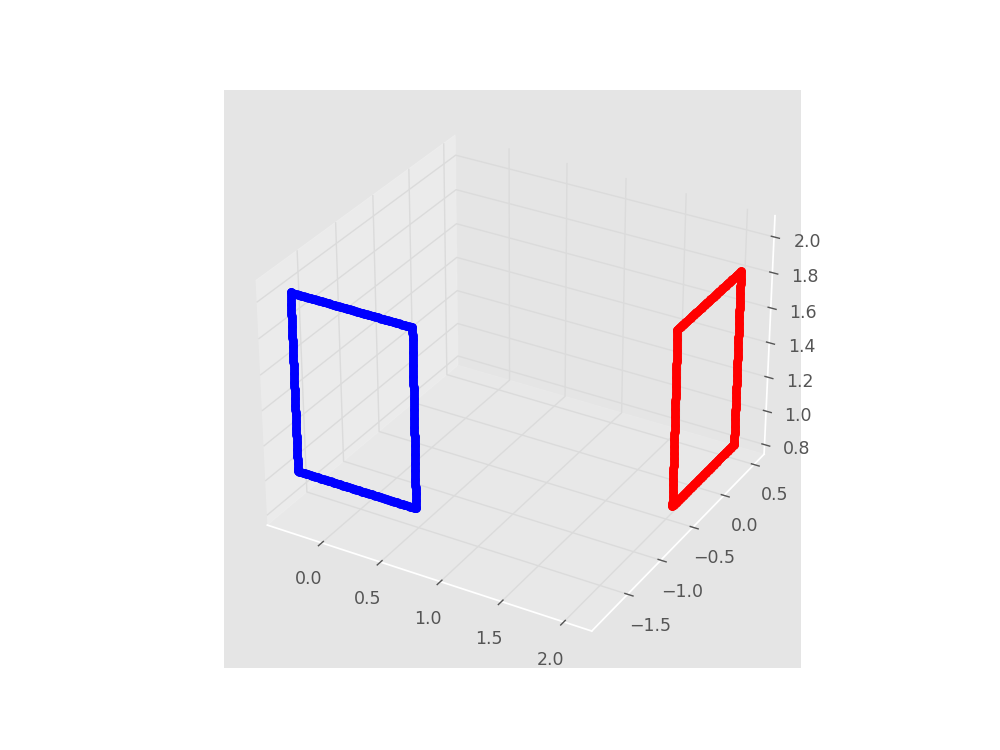

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for pozycja in trans_list:
    ax.scatter(pozycja.t[0], pozycja.t[1], pozycja.t[2], color='red')
for pozycja in trans_list2:
    ax.scatter(pozycja.t[0], pozycja.t[1], pozycja.t[2], color='blue')

<IPython.core.display.Javascript object>


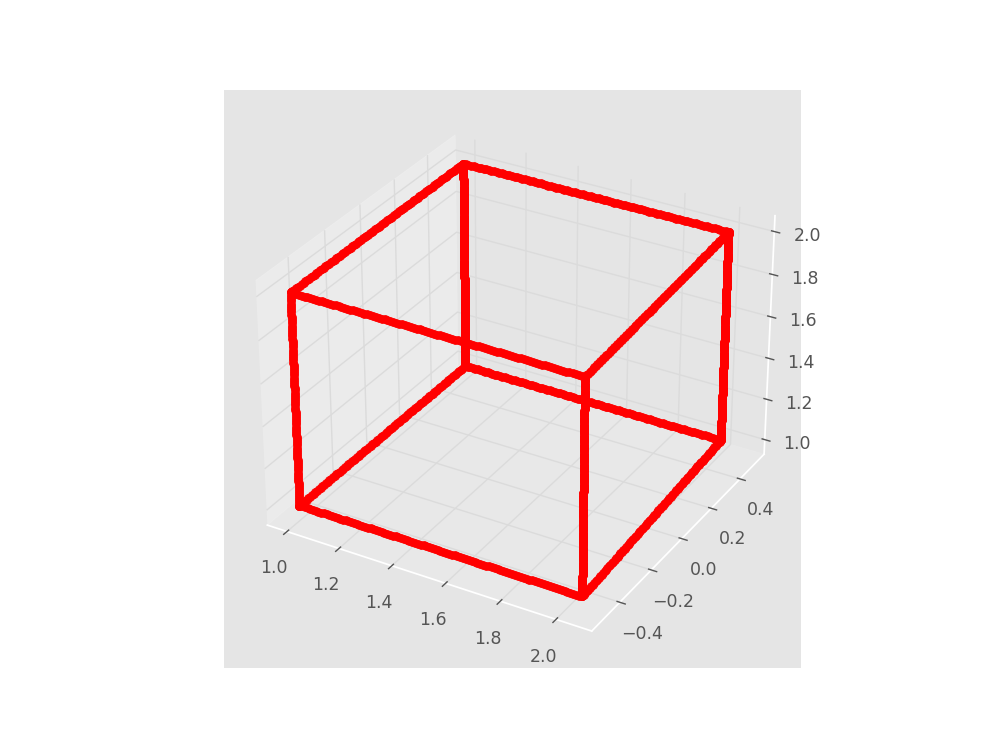

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for pozycja in trans_list3:
    ax.scatter(pozycja.t[0], pozycja.t[1], pozycja.t[2], color='red')